In [1]:
using AutomotiveDrivingModels
"loading modules"

"loading modules"

# Rendering

In [2]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "Renderer.jl")); using .Renderer
include(Pkg.dir("AutomotiveDrivingModels", "viz", "ColorScheme.jl")); using .ColorScheme

In [3]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
# reload("/home/tim/Documents/wheelerworkspace/Bosch/viz/incl_pyplot_utils.jl")

  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/tim/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1
  likely near /home/tim/.

# Select Street Network

In [4]:
const STREETMAP_DIR = "/media/tim/DATAPART1/Data/Bosch/processed/streetmaps"
streetmap_files = filter(readdir(STREETMAP_DIR)) do content
    path = joinpath(STREETMAP_DIR,content)
    isfile(path) && endswith(content, ".jld")
end
println("available streetnetworks:")
streetmap_files

available streetnetworks:


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tim/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tim/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/tim/.julia/v0.4/Reel/src/Reel.jl, in expression starting on line 85
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at loading.jl:243
 [inlined code] from /home/tim/.julia/v0.4/Requires/src/require.jl:11
 in require at /home/tim/.julia/v0.4/MacroTools/src/utils.jl:108
 in include at ./boot.jl

12-element Array{ByteString,1}:
 "streetmap_280N_big.jld"                  
 "streetmap_280_pagemill_to_92.jld"        
 "streetmap_280_pagemill_to_92_old.jld"    
 "streetmap_280S_big.jld"                  
 "streetmap_circuit_2lane.jld"             
 "streetmap_detroit_v4.jld"                
 "streetmap_highway_1lane.jld"             
 "streetmap_highway_2lane.jld"             
 "streetmap_highway_3lane.jld"             
 "streetmap_highway_4lane.jld"             
 "streetmap_its_both_loops_v3_smoothed.jld"
 "streetmap_its_inner_loop_v1_2.jld"       

# Select CSV File

In [5]:
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-15-04-57_92_to_pagemill_manual_drive_planning_stripped-raw.csv";
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-22-14-05-41_280S_manual_drive_lane_changes_planning_stripped-raw.csv";
csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-14-39-22_planning_stripped-raw.csv"

"/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-14-39-22_planning_stripped-raw.csv"

In [6]:
header, trajdata, sn = load_header_trajdata_and_streetmap(csv_filepath)
extract_params = PrimaryDataExtractionParams()
"done"

"done"

Interact.Slider{Int64}([Reactive.Input{Int64}] 9509,"frame",9509,1:19018)

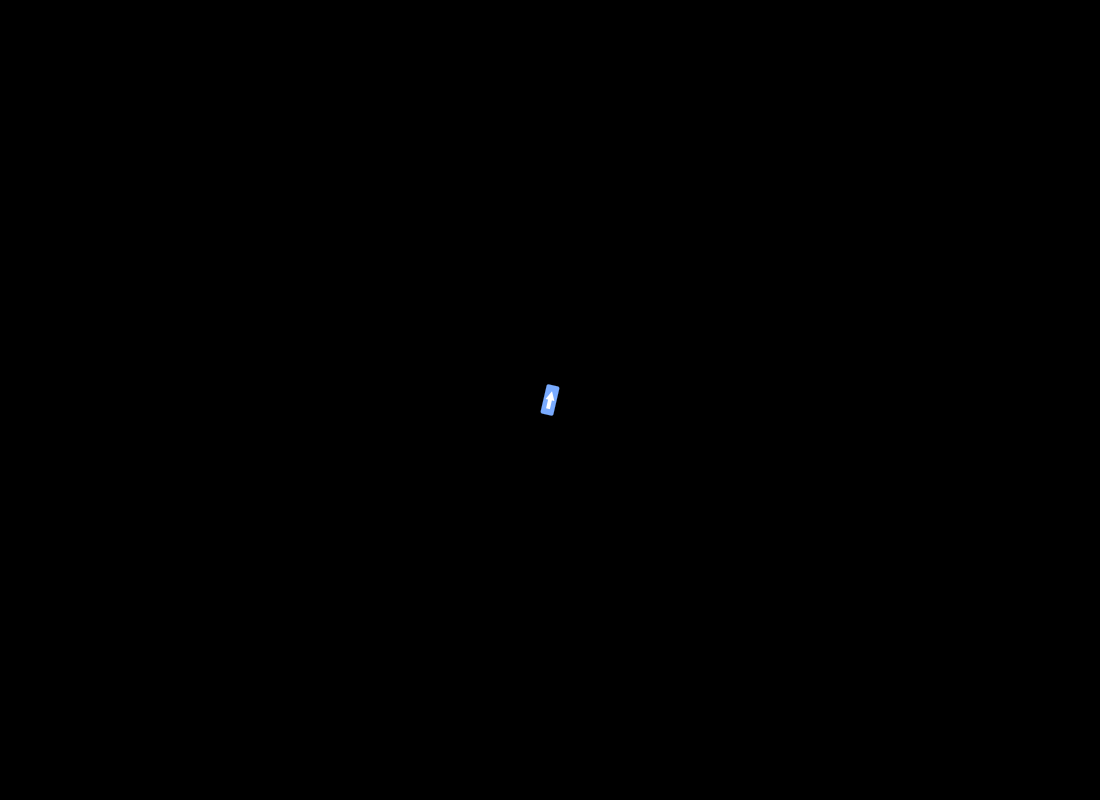

In [7]:
plot_manipulable_trajdata(trajdata, sn, canvas_height=800)

In [8]:
tic()
runlogs = extract_runlogs(trajdata, sn, extract_params, header)
toc()
"done"

LoadError: LoadError: MethodError: `isnan` has no method matching isnan(::Void)
while loading In[8], in expression starting on line 2

In [9]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
overlays = Overlay[]
push!(overlays, TextStatsOverlay())
push!(overlays, TrajdataOverlay(trajdata))
plot_manipulable_runlog(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600, overlays=overlays)

LoadError: LoadError: UndefVarError: runlogs not defined
while loading In[9], in expression starting on line 5

In [10]:
frames = 2779:2780
the_values = collect(repeated(ContextClass.FREEFLOW, length(frames)))
RunLogs.set!(runlogs[1], ID_EGO, frames, :behavior, the_values);

LoadError: LoadError: UndefVarError: runlogs not defined
while loading In[10], in expression starting on line 3